In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data

In [2]:
import numpy as np
import pandas as pd

In [3]:
# View more columns 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Unwanted columns

In [5]:
'''Drop all the unwanted columns'''
day.drop(["instant","dteday","casual","registered"], axis=1, inplace=True)

In [6]:
# Inspect the dataframe
day.shape

(730, 12)

In [7]:
# Percentage of null-values
'''As we can see there is no null data present'''
day.isnull().sum()/day.shape[0]

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

In [8]:
# Statistical summary of numerical columns
day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [9]:
# Check the datatype
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Data pre-processing

In [10]:
day["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [11]:
day["mnth"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [12]:
day["weekday"].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [13]:
day["weathersit"].unique()

array([2, 1, 3], dtype=int64)

In [14]:
'''convert numerical values to string value'''

day["season"] = day["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
day["mnth"] = day["mnth"].map({1:"jan", 2:"feb", 3:"mar", 4:"apl", 5:"may", 6:"jun", 
                                 7:"jul", 8:"aug", 9:"sep", 10:"oct", 11:"nov", 12:"dec"})
day["weekday"] = day["weekday"].map({0:"sunday", 1:"monday",2:"tuesday", 3:"wednesday",
                                        4:"thusday", 5:"friday", 6:"saturday"})
day["weathersit"] = day["weathersit"].map({1:"clear",  2:"mist cloudy", 3:"light snow/rain", 4:"extreme"})

# Rename the columns
day.rename(columns={"yr":"year", "mnth":"month"}, inplace=True)

In [15]:
day.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,monday,1,mist cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tuesday,1,mist cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thusday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Datatypes

In [16]:
# check the datatype
day.dtypes

season         object
year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

### Visualising Numeric Variables

In [17]:
'''Split the numerical columns and categorical columns for easy analysis.'''

num_col = ["temp","atemp","hum","windspeed","cnt"]
cat_col = ["season","month","weekday","weathersit"]

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Display prcentage over the plots.
def Percent(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.15
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

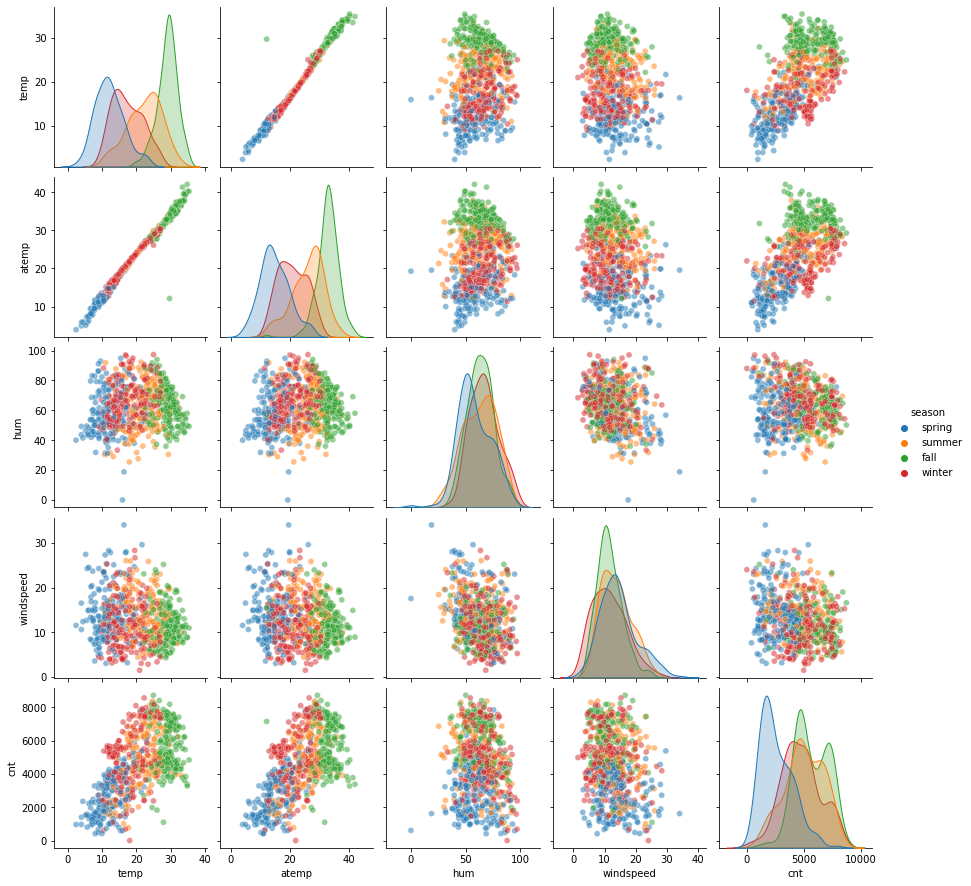

In [20]:
# create dataframe for numerical columns
day_num = day[["temp","atemp","hum","windspeed","season","cnt"]]
hue_order = ["spring","summer","fall","winter"]
sns.pairplot(day_num, diag_kind="kde", hue="season", plot_kws={'alpha':0.5}, hue_order=hue_order)
plt.show()

<b>Inference:</b> 
              
              1. As there is rise in temperature we can find more bikes are rented.
              2. During spring season, bike renting is low if the windspeed is high.
              3. On an average days during winter and summer people rent bikes if the temperature lies in 
                  between 16-25(in degree Celsius).

### Visualising Categorical Variables

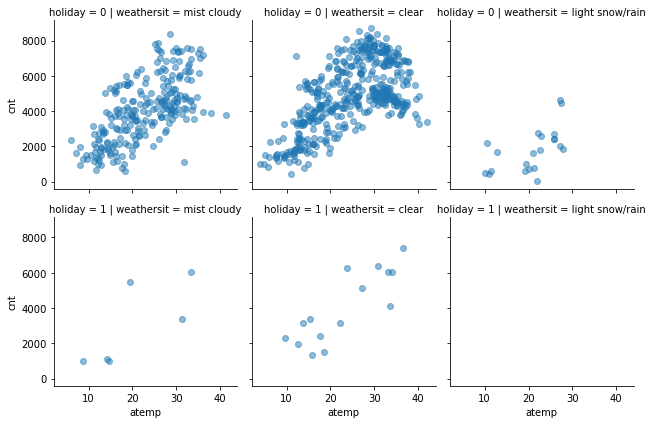

In [21]:
grid = sns.FacetGrid(day, row = "holiday", col = "weathersit")
grid.map(plt.scatter, "atemp", "cnt", alpha = 0.5)
plt.show()

<b>Inference:</b> 
              
              1. Customers rent  more bikes during clear and mist cloudy weather conditions.
              2. customers plan for trip in weekends/holidays. Hence, more rentals during non-working days.

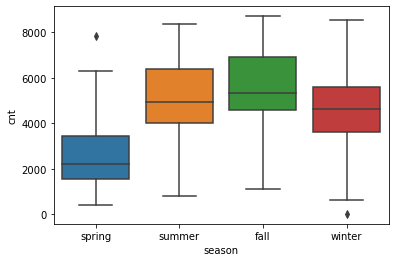

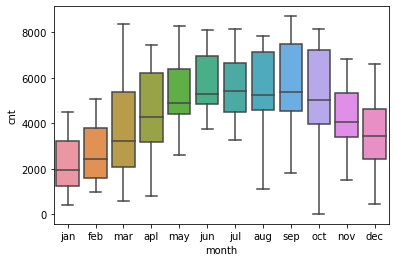

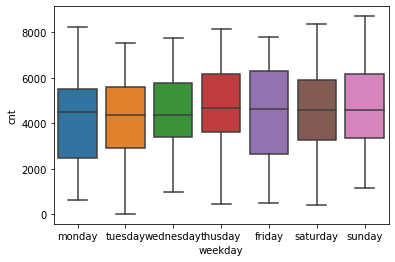

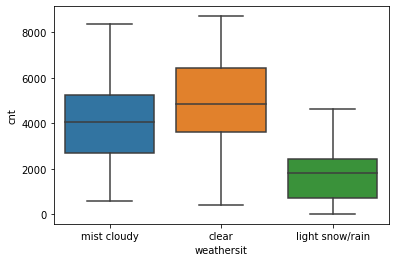

In [22]:
for col in cat_col:
    sns.boxplot(y=day["cnt"], x=day[col]) 
    plt.xticks(rotation=0)
    plt.show()

<b>Inference:</b>

            1. Median of the bike rentals are nearly same for all the days in a week.
            2. For past two years, "sep" has 8500 rentals and its the highest.
            3. Approx.500 customers prefer to take rental bikes in every season(omiting the 
               extreme cases in winter season).

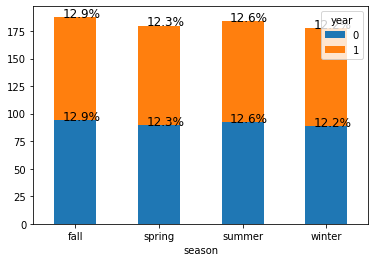

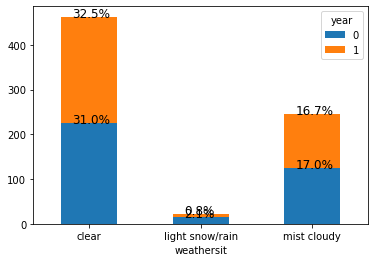

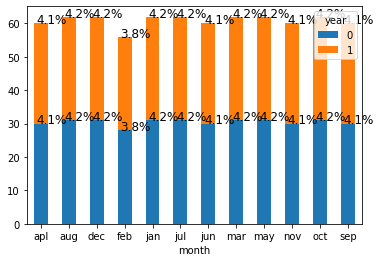

In [23]:
cat_col = ["season","weathersit","month"]
for col in cat_col:
    ax = pd.crosstab(day[col], day["year"]).plot(kind='bar', stacked=True)
    plt.xticks(rotation=0)
    Percent(ax,day[col])
    plt.show()

<b>Inference:</b>

           1. During fall, bikes rented are high.
           2. In Feb 2019, customers are less likely to rent.
           3. In 2018, bike rentals were significantly high than 2019 during light snow/rain.

### Dummy Variables

In [24]:
# Function to create dummy variable
def dummy(df,x):
        dummy_x = pd.get_dummies(df[x], drop_first=True)
        df = pd.concat([df,dummy_x], axis=1)
        df_update = df.drop(x, axis=1)
        return df_update

In [25]:
# Creating a new dataframe without distrubing new dataframe
day = dummy(day,"season")
day = dummy(day,"month")
day = dummy(day,"weekday")
day = dummy(day,"weathersit")

day.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,monday,saturday,sunday,thusday,tuesday,wednesday,light snow/rain,mist cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


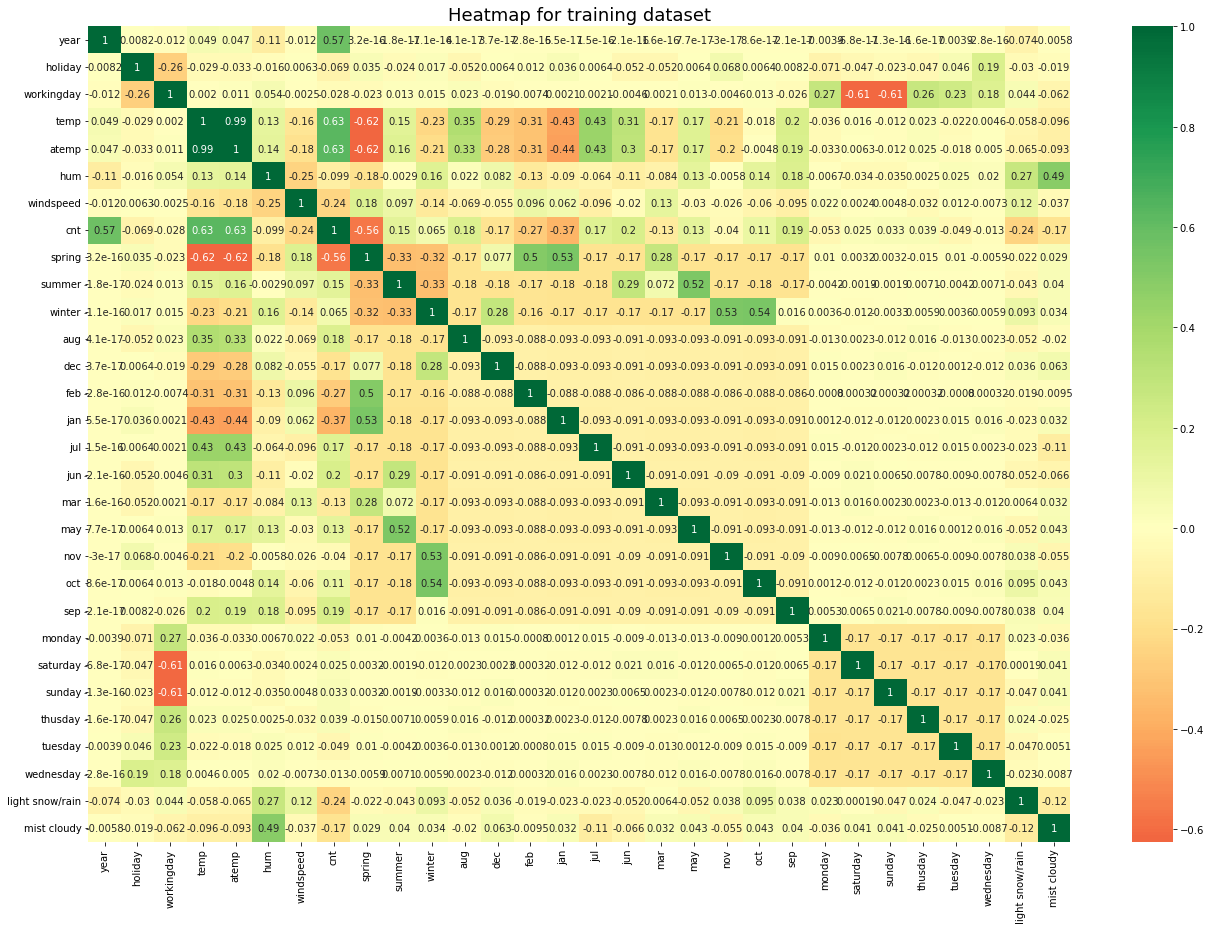

In [26]:
# corelation matrix
plt.figure(figsize=[22,15])
sns.heatmap(day.corr(), annot=True, cmap="RdYlGn", center=0.0)
plt.title("Heatmap for training dataset", fontsize=18)
plt.show()

<b>Inference:</b> 

           1. The columns "temp" and "atemp" are highly correlated. It leads to multicollinearity.
           2. "yr" and "cnt" have decent value of correlation. Hence, we can conclude that company 
               gets more rentals than the previous year. 
           3. As spring happens during jan and feb and they are in correlation. Same relation holds 
               for other seasons with their respective month.
           4. Humidity is associated with light snow/rain. Humidity increases with moderate rain or 
               snow.
           5. Temperature influence more during spring season,august and july month.
           6. Weekends- Saturday and Sunday have great influence over workingday. 

In [27]:
'''Multicollinearity'''
day.drop(columns="temp", inplace=True)

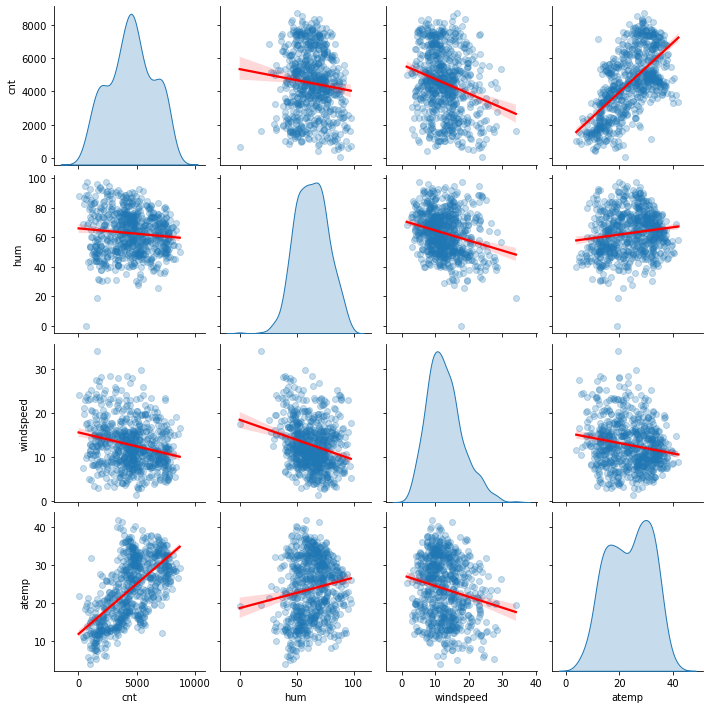

In [28]:
# plot numerical variables
num_col = list(set(num_col) - set(["temp"]))
sns.pairplot(day[num_col], kind="reg", diag_kind="kde", 
             plot_kws={"line_kws":{"color":"red"}, "scatter_kws":{"alpha":0.25}})
plt.show()

<b>Inference:</b> 
            
    From below scatterplot,Predictor varibles -"atemp" has a linear relationship with target variable(i.e;"cnt") 
    and with a decent correlation value of 0.63           

## Split the data

In [29]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
day_train, day_test = train_test_split(day, train_size=0.8, test_size=0.2, random_state=90)

In [30]:
# Train dataset.
day_train.shape

(584, 29)

In [31]:
# Test dataset.
day_test.shape

(146, 29)

### Rescaling the features

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
# Apply scaler() to numerical DataType column
day_train[num_col] = scaler.fit_transform(day_train[num_col])
day_train.reset_index(drop=True, inplace=True)
day_train.head()

,year,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,monday,saturday,sunday,thusday,tuesday,wednesday,light snow/rain,mist cloudy
0,1,0,1,0.795348,0.612852,0.270528,0.814887,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0.676840,0.459373,0.211549,0.596180,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0.320487,0.605417,0.658984,0.468477,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,0,0,1,0.538428,0.609134,0.279504,0.366084,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,1,0.197158,0.317417,0.339143,0.181546,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Dividing into X and Y sets for the model building

In [34]:
y_train = day_train.pop("cnt")
X_train = day_train
print("Dimension of target variable:   ",y_train.shape)
print("Dimension of predictor variable:",X_train.shape)

Dimension of target variable:    (584,)
Dimension of predictor variable: (584, 28)


## Building our model

## RFE
Recursive feature elimination

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 14),
 ('winter', True, 1),
 ('aug', False, 11),
 ('dec', True, 1),
 ('feb', False, 12),
 ('jan', False, 10),
 ('jul', True, 1),
 ('jun', False, 9),
 ('mar', True, 1),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 2),
 ('sep', True, 1),
 ('monday', False, 4),
 ('saturday', False, 6),
 ('sunday', False, 13),
 ('thusday', False, 8),
 ('tuesday', False, 3),
 ('wednesday', False, 5),
 ('light snow/rain', True, 1),
 ('mist cloudy', True, 1)]

In [38]:
feature = X_train.columns[rfe.support_]
feature

Index(['year', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'dec', 'jul', 'mar', 'may', 'nov', 'sep', 'light snow/rain', 'mist cloudy'], dtype='object')

In [39]:
# Columns unselected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'aug', 'feb', 'jan', 'jun', 'oct', 'monday', 'saturday', 'sunday', 'thusday', 'tuesday', 'wednesday'], dtype='object')

In [40]:
# Dataframe of Top 15 features
X_train_rfe = X_train[feature]

### Building model using statsmodel, for the detailed statistics

In [41]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
#Build a linear model and show summary as the result:
def summary(X_train_rfe):    
        # Add a constant
        X_train_lm = sm.add_constant(X_train_rfe)
        
        # Create a fitted model
        lr = sm.OLS(y_train, X_train_lm).fit()
        return lr.summary()

# Check for the VIF values of the feature variables:
def VIF(X_train_rfe):
    vif = pd.DataFrame()
    vif["Features"] = X_train_rfe.columns
    vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model1:

In [43]:
summary(X_train_rfe)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     197.2
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          1.05e-213
Time:                        15:58:24   Log-Likelihood:                 584.32
No. Observations:                 584   AIC:                            -1137.
Df Residuals:                     568   BIC:                            -1067.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3338      0.028     12.025      0.000       0.279       0.388
year                0.2303      0.008     30.165      0.000       0.215       0.245
holiday            -0.0921      0.023     -3.970      0.000      -0.138      -0.047
atemp               0.4772      0.032     15.061      0.000       0.415       0.539
hum                -0.1797      0.031     -5.789      0.000      -0.241      -0.119
windspeed          -0.1361      0.027     -5.119      0.000      -0.188      -0.084
spring             -0.1240      0.015     -8.389      0.000      -0.153      -0.095
winter              0.0909      0.013      7.003      0.000       0.065       0.116
dec                -0.0511      0.015     -3.335      0.001      -0.081      -0.021
jul                -0.0566      0.016     -3.559      0.000      -0.088      -0.025
mar                 0.0446      0.014      3.079      0.002       0.016       0.073
may                 0.0332      0.016      2.132      0.033       0.003       0.064
nov                -0.0584      0.017     -3.354      0.001      -0.093      -0.024
sep                 0.0708      0.014      4.923      0.000       0.043       0.099
light snow/rain    -0.2081      0.027     -7.767      0.000      -0.261      -0.155
mist cloudy        -0.0465      0.010     -4.559      0.000      -0.066      -0.026
==============================================================================
Omnibus:                       98.268   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.437
Skew:                          -0.836   Prob(JB):                     1.39e-58
Kurtosis:                       5.855   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
VIF(X_train_rfe)

,Features,VIF
3,hum,18.42
2,atemp,13.81
4,windspeed,5.18
6,winter,2.81
14,mist cloudy,2.54
5,spring,2.46
0,year,2.03
11,nov,1.70
8,jul,1.49
7,dec,1.46


### Model2:

In [45]:
'''As "hum" has very high VIF value'''

X_train_rfe2 = X_train_rfe.drop("hum", axis=1)
print(summary(X_train_rfe2))

VIF(X_train_rfe2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     197.6
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          8.05e-208
Time:                        15:58:24   Log-Likelihood:                 567.58
No. Observations:                 584   AIC:                            -1105.
Df Residuals:                     569   BIC:                            -1040.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2532      0.025     

,Features,VIF
2,atemp,5.82
3,windspeed,5.18
5,winter,2.45
0,year,2.01
4,spring,1.88
10,nov,1.69
13,mist cloudy,1.58
7,jul,1.47
6,dec,1.41
11,sep,1.27


### Model3:

In [46]:
'''As "windspeed" has high VIF'''

X_train_rfe3 = X_train_rfe2.drop("windspeed", axis=1)
print(summary(X_train_rfe3))

VIF(X_train_rfe3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     207.6
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          2.79e-206
Time:                        15:58:24   Log-Likelihood:                 561.16
No. Observations:                 584   AIC:                            -1094.
Df Residuals:                     570   BIC:                            -1033.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2133      0.022     

,Features,VIF
2,atemp,3.40
4,winter,2.44
0,year,2.00
9,nov,1.66
12,mist cloudy,1.57
3,spring,1.47
6,jul,1.44
5,dec,1.41
10,sep,1.26
8,may,1.25


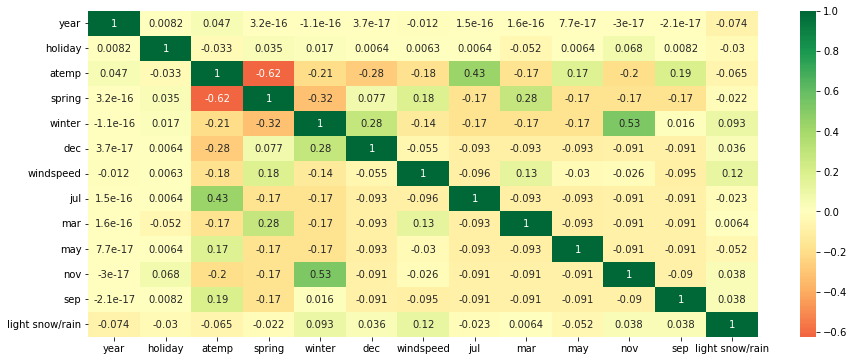

In [47]:
# X_train_rfe3.columns
plt.figure(figsize=[15,6])
sns.heatmap(day[['year', 'holiday', 'atemp', 'spring', 'winter', 'dec', 'windspeed',
     'jul', 'mar', 'may', 'nov', 'sep', 'light snow/rain']].corr(), annot=True, cmap="RdYlGn", center=0.0)
plt.show()

From above observation, we will remove features- "jul","mar","may" as it less effects over other variables. Hence, we will remove them.

### Model4:

In [48]:
'''As "may" has high p-value'''

X_train_rfe4 = X_train_rfe3.drop("may", axis=1)
print(summary(X_train_rfe4))

VIF(X_train_rfe4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.3
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          4.96e-207
Time:                        15:58:25   Log-Likelihood:                 560.13
No. Observations:                 584   AIC:                            -1094.
Df Residuals:                     571   BIC:                            -1037.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2177      0.022     

,Features,VIF
2,atemp,2.95
4,winter,2.37
0,year,2.00
8,nov,1.66
11,mist cloudy,1.56
3,spring,1.45
5,dec,1.41
6,jul,1.36
9,sep,1.22
7,mar,1.21


### Model5:

In [49]:
'''As "jul" is doesn't give significance to model '''

X_train_rfe5 = X_train_rfe4.drop("jul", axis=1)
print(summary(X_train_rfe5))

VIF(X_train_rfe5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     239.7
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          6.01e-206
Time:                        15:58:25   Log-Likelihood:                 554.73
No. Observations:                 584   AIC:                            -1085.
Df Residuals:                     572   BIC:                            -1033.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2319      0.022     

,Features,VIF
2,atemp,2.33
4,winter,2.31
0,year,2.00
7,nov,1.66
10,mist cloudy,1.54
3,spring,1.44
5,dec,1.41
6,mar,1.21
8,sep,1.18
9,light snow/rain,1.06


### Model6:

In [50]:
'''As "mar" is doesn't give significance to model '''

X_train_rfe6 = X_train_rfe5.drop("mar", axis=1)

X_train_lm6 = sm.add_constant(X_train_rfe6)
lr_6 = sm.OLS(y_train, X_train_lm6).fit()
print(lr_6.summary())

VIF(X_train_rfe6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     260.5
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          9.46e-206
Time:                        15:58:25   Log-Likelihood:                 551.39
No. Observations:                 584   AIC:                            -1081.
Df Residuals:                     573   BIC:                            -1033.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2363      0.022     

,Features,VIF
2,atemp,2.32
4,winter,2.31
0,year,2.00
6,nov,1.66
9,mist cloudy,1.53
5,dec,1.39
3,spring,1.32
7,sep,1.17
8,light snow/rain,1.06
1,holiday,1.05


In [51]:
# Residual calculation using prediction on train data.
Y_pred  = lr_6.predict(X_train_lm6)
residuals = y_train - Y_pred

In [52]:
# Evaluvation using r-squared metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [53]:
# R-squared - Train
r2_Train = r2_score(y_train,Y_pred)
r2_Train = round(r2_Train,3)
print("R-squared = ",r2_Train)

# Adjusted R-squared -Train
'''n is number of rows in X_train'''
n = X_train_lm6.shape[0]
'''Number of features'''
p = X_train_lm6.shape[1]
Adj_r2_Train = 1-(1-r2_Train)*(n-1)/(n-p-1)
Adj_r2_Train = round(Adj_r2_Train, 2)
print("Adjusted R-squared = ",Adj_r2_Train) 

# Check the mean error for predicted value and actual value - Train dataset
mse_Train = mean_squared_error(y_train,Y_pred)
mse_Train = round(mse_Train, 3)
print("mean squared error = ",mse_Train)

R-squared =  0.82
Adjusted R-squared =  0.82
mean squared error =  0.009


## Residual Analysis of the train data

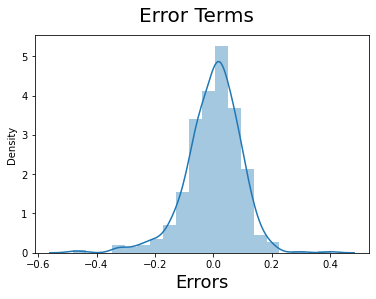

In [54]:
# Plot the histogram of the error terms
'''The mean of residuals is zero and it is normally distributed'''

fig = plt.figure()
sns.distplot(residuals, bins = 20, kde=True)
fig.suptitle("Error Terms", fontsize = 20)                  # Plot heading 
plt.xlabel("Errors", fontsize = 18)                         # X-label
plt.show()

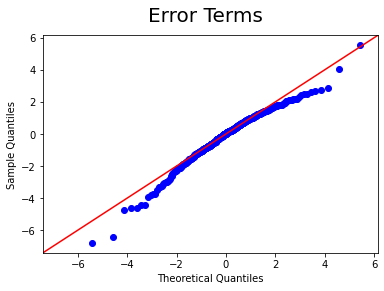

In [55]:
# Q-Q plot
'''The Q-Q plot infers that the residuals meets condition of homoscedasticity'''
import scipy.stats as stats

fig = sm.qqplot(residuals, stats.t, fit=True, line="45")
fig.suptitle("Error Terms", fontsize = 20)    
plt.show()

## Prediction based on Final model

In [56]:
# num_col = ["atemp", "hum", "windspeed", "cnt"]
day_test[num_col] = scaler.transform(day_test[num_col])

day_test.reset_index(drop=True, inplace=True)
day_test.head()

,year,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,monday,saturday,sunday,thusday,tuesday,wednesday,light snow/rain,mist cloudy
0,1,0,1,0.511907,0.695698,0.312814,0.757478,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0.980934,0.641529,0.411546,0.432812,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,0,1,0.543400,0.541158,0.089755,0.752761,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0.454726,0.562401,0.144876,0.493097,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,1,0,1,0.817730,0.330323,0.356392,0.713875,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [57]:
y_test = day_test.pop("cnt")
X_test = day_test
print("Dimension of target variable:   ",y_test.shape)
print("Dimension of predictor variable:",X_test.shape)

Dimension of target variable:    (146,)
Dimension of predictor variable: (146, 28)


### Make prediction

In [58]:
# Predict the value using best fit model

features = X_train_rfe6.columns
X_test_rfe = X_test[features] 
X_test_lm = sm.add_constant(X_test_rfe)
y_pred  = lr_6.predict(X_test_lm)

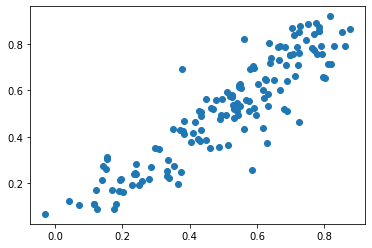

In [59]:
# Visualise the predicted value Vs predictor variable
plt.scatter(y_pred, y_test)

## Evaluvate the model

In [60]:
# Evaluvate using r-squared metrics - Test dataset
r2_Test = r2_score(y_test,y_pred)
r2_Test = round(r2_Test, 3)
print("R-squared = ",r2_Test) 

R-squared =  0.824


In [61]:
# Check the mean error for predicted value and actual value - Test dataset
from sklearn.metrics import mean_squared_error
mse_Test = mean_squared_error(y_test,y_pred)
mse_Test = round(mse_Test, 3)
print("mean squared error =" ,mse_Test)

mean squared error = 0.009


In [62]:
# Adjusted R-squared - Test dataset

'''n is number of rows in X_test'''
n = X_test_lm.shape[0]

'''Number of features'''
p = X_test_lm.shape[1]

adj_r2_Test = 1-(1-r2_Test)*(n-1)/(n-p-1)
adj_r2_Test = round(adj_r2_Test, 3)
print("Adjusted R-squared = ",adj_r2_Test)

Adjusted R-squared =  0.81


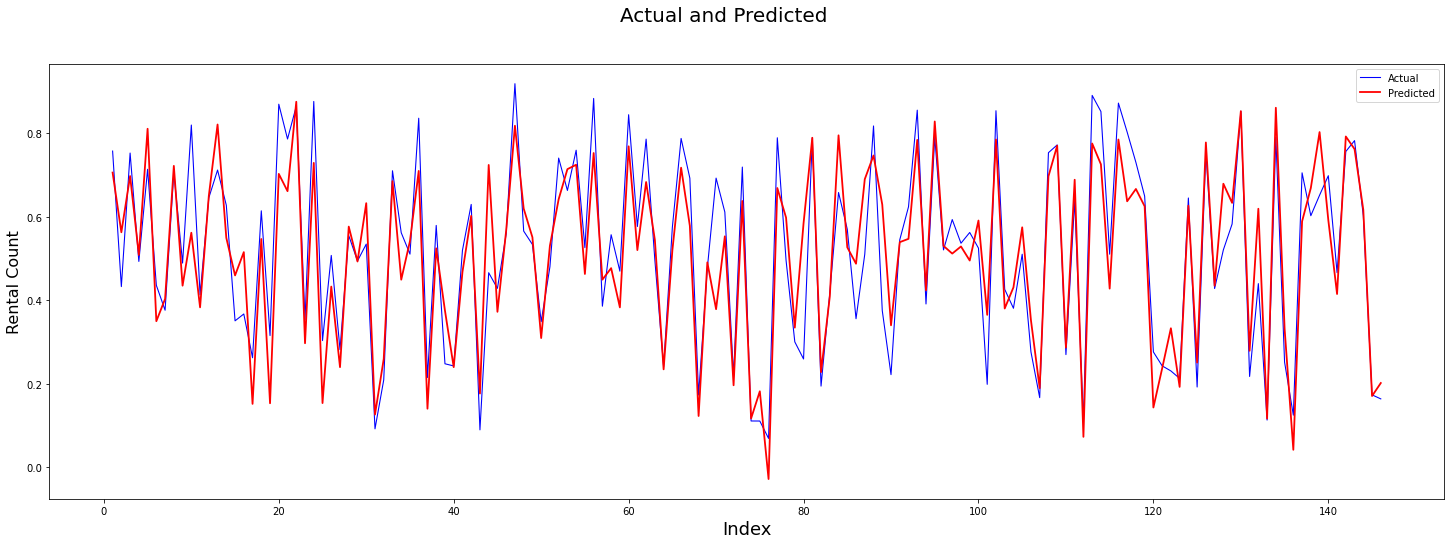

In [63]:
#Actual vs Predicted - Test dataset
c = [i for i in range(1,147,1)]
fig = plt.figure(figsize=[25,8])
plt.plot(c,y_test, "b-", linewidth=1.08, label="Actual")
plt.plot(c,y_pred, "r-", linewidth=1.8, label="Predicted")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Rental Count', fontsize=16)                               # Y-label
plt.legend()
plt.show()

<b>Inference:</b>  

         The model is able to predict the test data without overfiting.

## Results

In [64]:
print("Model results:")

data = [[r2_Train,Adj_r2_Train,mse_Train,"Train","82%"], [r2_Test,adj_r2_Test,mse_Test,"Test","81%"]]
model_eval = pd.DataFrame(data, columns=["R-squared","Adjusted R-squared","MSE","Dataset/Summary","Accuracy"])
model_eval.set_index("Dataset/Summary")

Model results:


,R-squared,Adjusted R-squared,MSE,Accuracy
Dataset/Summary,,,,
Train,0.820,0.82,0.009,82%
Test,0.824,0.81,0.009,81%


The model possess 82% accuracy on train dataset, whereas with 81% on test dataset.